In [1]:
import numpy as np
np.random.seed(666)
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = '../Nested_Points.txt'
data = np.loadtxt(path)

In [3]:
class NESTEDLOOP:
    
    def __init__(self,r,pi):
        """
        r : points within r-radius circle are considred as neighbors
        pi : threshold to detect outliers
        """
        self.r = r
        self.pi = pi

    def distance(self,x,y):
        """
        Coumpute l2 distance
        
        x,y : array points
        """
        return np.linalg.norm(x-y)
    
    def fit(self,data):
        """
        Nested Loop Algotirhm
        """
        self.n = len(data)
        self.data = data
        
        #shuffle data
        np.random.shuffle(data)
        
        index = range(self.n)
        
        outliers = []
        
        for i in index:
            count = 0
            for j in index:
                if i == j:
                    continue
                else:
                    dis = self.distance(data[i],data[j]) #cal distance
                    if dis <= self.r: #if distance < r, consider as neighbors
                        count += 1
            if count/self.n <= self.pi: #if # of neighbors < pi, consider as outlier
                outliers.append(data[i])
                
        self.outliers = np.array(outliers)
    
    def plot(self):
        """
        plot the result
        """
        df = pd.DataFrame(self.data)
        
        
        fig = plt.figure(figsize=(6,4),dpi=200)
        plt.scatter(df[0], df[1],label='normal')
        plt.scatter(self.outliers[:,0],self.outliers[:,1],color='red',label='outliers')
        plt.legend()

[[95.41160594 32.02898551]
 [31.71390013 91.15942029]
 [86.23481781  9.13043478]
 [85.42510121 10.        ]
 [10.25641026 66.95652174]
 [67.7462888   5.36231884]]


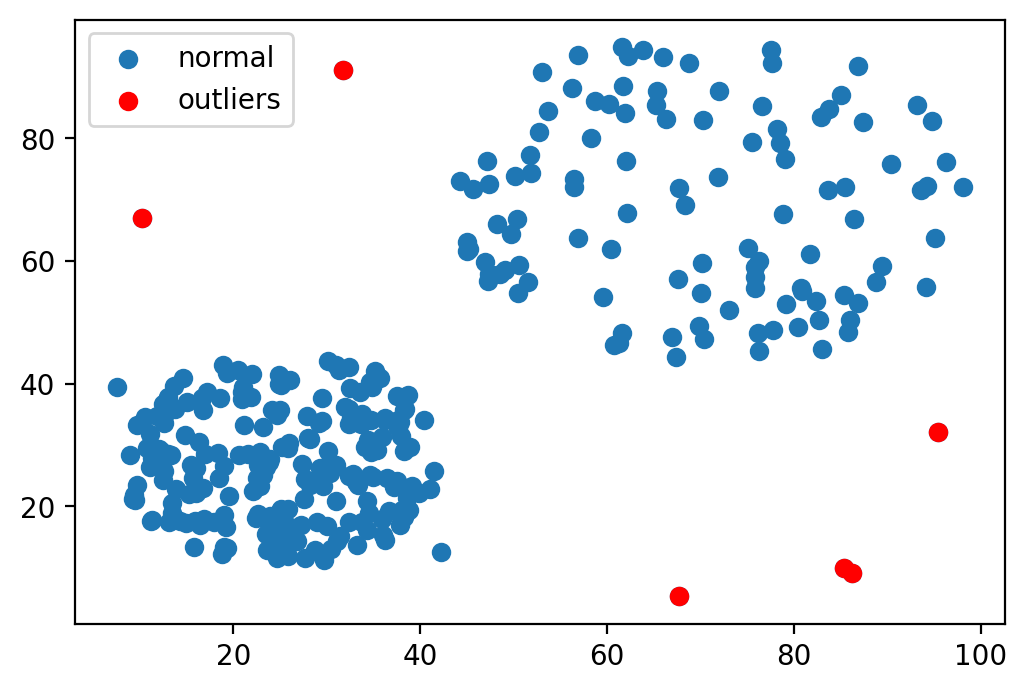

In [5]:
nestedloop = NESTEDLOOP(r = 10,pi = 0.01)
nestedloop.fit(data)
nestedloop.plot()
print(nestedloop.outliers)